In [7]:
import xarray as xr
import proplot as plot
import sys
import cartopy.crs as ccrs
import matplotlib.path as mpath
import numpy as np
from shapely import geometry

In [8]:
da = xr.open_dataset('/Data/gfi/share/ModData/NORA3-WP/NORA3-WP-ncfile/WindPower_capacity_factor_monthly.nc',decode_times=False)

In [9]:
a = da.isel(T=1,M=0,turbine=1)

Make borders for plot (ikke så elegant løsning, men det virker) 

In [10]:
lat_s = a.lat[0].values;    lon_s = a.lon[0].values
lat_n = a.lat[-1].values;   lon_n = a.lon[-1].values
lon_w = a.lon[:,0].values;  lat_w = a.lat[:,0].values
lon_e = a.lon[:,-1].values; lat_e = a.lat[:,-1].values

In [11]:
pp_s = []
i = 0
for lon,lat in zip(lon_s,lat_s): 
    pp_s.append(geometry.Point(lon,lat))
    i +=1
    
pp_e = []
i = 0
for lon,lat in zip(lon_e,lat_e): 
    pp_e.append(geometry.Point(lon,lat))
    i +=1

pp_n = []
i = 0
for lon,lat in zip(lon_n[::-1],lat_n[::-1]): 
    pp_n.append(geometry.Point(lon,lat))
    i +=1
pp_w = []
i = 0
for lon,lat in zip(lon_w[::-1],lat_w[::-1]): 
    pp_w.append(geometry.Point(lon,lat))
    i +=1

In [12]:
point_list = pp_e+pp_n+pp_w+pp_s
poly = geometry.Polygon([[p.x, p.y] for p in point_list])
poly_test = np.array([*poly.exterior.xy]).T
rect = mpath.Path(poly_test)

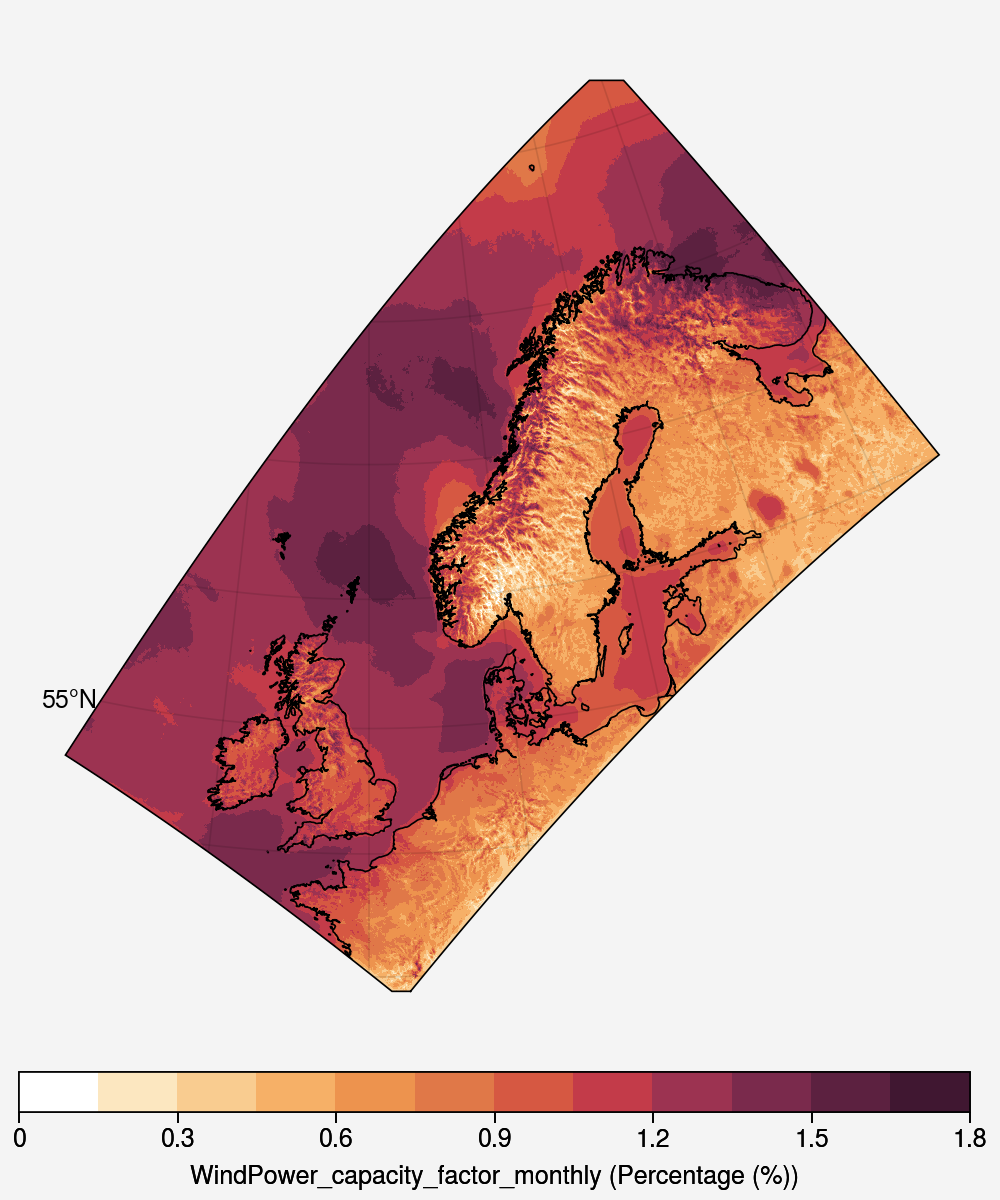

In [18]:
fig,ax=plot.subplots(projection=ccrs.LambertConformal(central_latitude=66.3,central_longitude=0),height=6,width=5)
proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax[0]) - ax[0].transData
rect_in_target = proj_to_data.transform_path(rect)
ax.pcolormesh(a.lon,a.lat,a.WindPower_capacity_factor_monthly,colorbar='b')
ax.format(coast=True,labels=True,lonlim=[-20,35],latlim=[44,76],reso='hi',grid=True)
ax.set_boundary(rect_in_target)